## Gradient Descent on Boston Housing Dataset

### 1.1 Data Preprocessing


1. CRIM - per capita crime rate by town  
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
3. INDUS - proportion of non-retail business acres per town.  
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
5. NOX - nitric oxides concentration (parts per 10 million)  
6. RM - average number of rooms per dwelling  
7. AGE - proportion of owner-occupied units built prior to 1940  
8. DIS - weighted distances to five Boston employment centres  
9. RAD - index of accessibility to radial highways  
10. TAX - full-value property-tax rate per $10,000  
11. PTRATIO - pupil-teacher ratio by town  
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. LSTAT - % lower status of the population  

The value for prediction:  
MEDV - Median value of owner-occupied homes in $1000's


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn

In [88]:
# Importing the dataset
absolute_path = os.path.abspath(os.getcwd())
dataset = pd.read_csv(f'{absolute_path}/Data-Preprocessing/Datasets/HousingData.csv')
#Create a copy of the dataset
dataset_copy = dataset.copy()
#Calculate number of rows and columns in dataset
print(dataset.shape)
dataset.head()

print(len(dataset.columns))

(506, 14)
14


In [24]:
dataset = dataset.dropna() #Drop all rows with NaN values
dataset.shape

(394, 14)

In [25]:
# Replace NaN values with the mean of the column
dataset_copy = dataset_copy.fillna(dataset.mean())
dataset_copy.shape

(506, 14)

In [29]:
# Normalize the dataset and the copy
dataset = (dataset - dataset.mean()) / dataset.std()
dataset_copy = (dataset_copy - dataset_copy.mean()) / dataset_copy.std()

In [33]:
# Split the dataset into X and y
X = dataset.iloc[:, :-1].values
X_copy = dataset_copy.iloc[:, :-1].values

y = dataset.iloc[:, -1].values
y_copy = dataset_copy.iloc[:, -1].values

X.shape, y.shape

((394, 13), (394,))

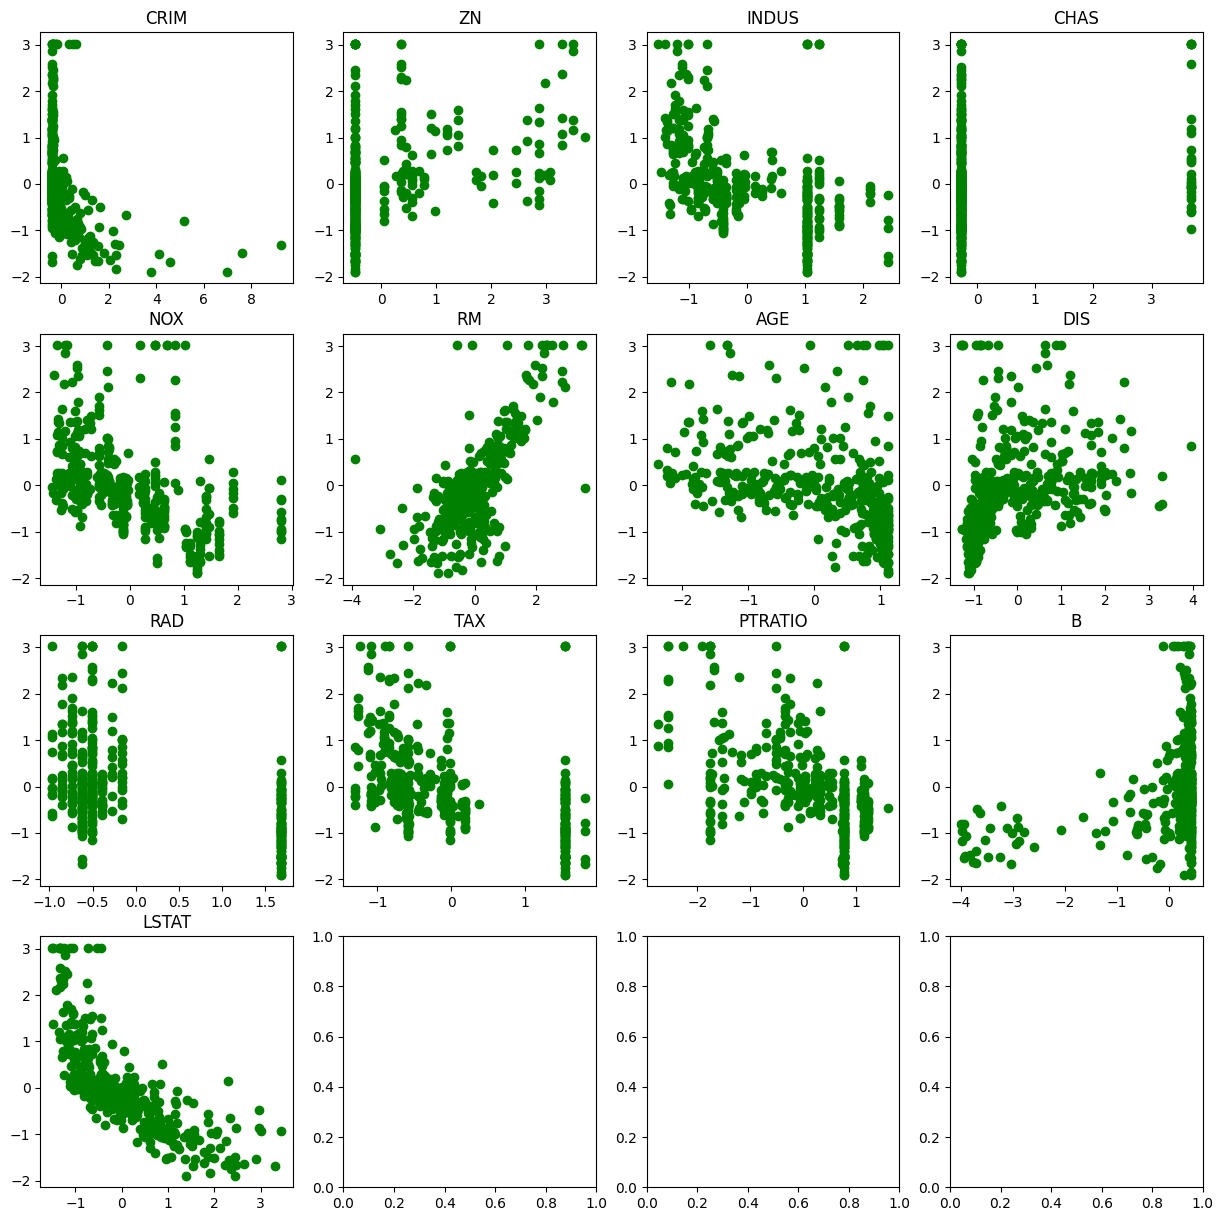

In [96]:
#plot subplots wrt to each feature
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        if 4*i+j<=12:
            axs[i,j].scatter(X[:,4*i+j], y, color = 'green')
            axs[i,j].set_title(dataset.columns[4*i+j])


In [196]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 0) #Split the dataset into train and test, 20% test data and 80% train data

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [197]:
# Add a column of ones to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

X_train.shape, X_test.shape

((404, 14), (102, 14))

### 1.2 Batch Gradient Descent


1. ![Cost Function](./images/cost_function.png)  
**This is the cost function to measure how close our predicted values (h(xi)) are close to corresponding y.**

2. ![Batch Gradient Descent](./images/batch_gradient_descent.png)   
**This is how the theta is updated at each step.**


In [223]:
## Batch Gradient Descent

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, X.shape[1]))
    for i in range(iterations):
        y_pred = X.dot(theta) #Predicted value of y using the current value of theta
        theta = theta - (1/m)*alpha*(X.T.dot(y_pred-y)) #Update theta based on the gradient descent rule
        theta_history[i,:] = theta.T
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history, theta_history

In [206]:
def predict(X, theta):
    """
    Predicts the value of y given X and theta
    """
    # Calculate the prediction
    prediction = X.dot(theta)
    return prediction

In [207]:
def rmse(prediction, y):
    """
    Calculates the root mean squared error between the prediction and the actual values
    """
    return np.sqrt(np.mean((prediction - y)**2))

In [224]:
theta,cost_history,theta_history = gradient_descent(X_train, y_train, theta, 0.01, 1000)
prediction = predict(X_test,theta)
rmse_num = rmse(prediction, y_test)
print('RMSE =', rmse_num)
print('Final cost =', cost_history[-1])
print('Final value of theta =', theta)
# print('cost_history =', cost_history)
# print('theta_history =', theta_history)

RMSE = 0.6526627265755496
Final cost = 0.11915588263496057
Final value of theta = [-0.00288074 -0.10281874  0.0766422  -0.06499141  0.07937939 -0.1365743
  0.32681216 -0.06641548 -0.28363644  0.0991837  -0.08517824 -0.23011507
  0.08212147 -0.3210724 ]


Text(0.5, 1.0, 'Actual vs Prediction')

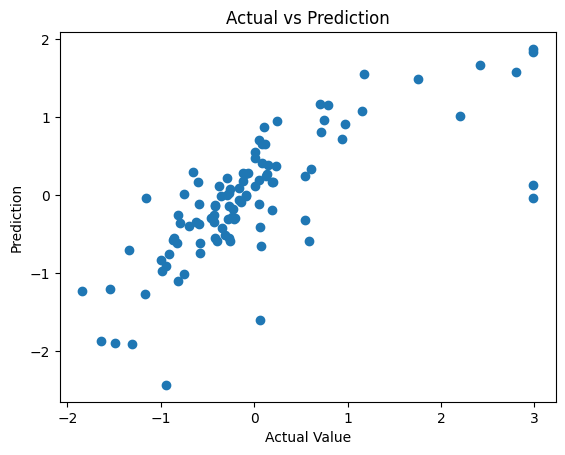

In [225]:
# Plot the prediction vs the actual values
plt.scatter(y_test, prediction)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction')

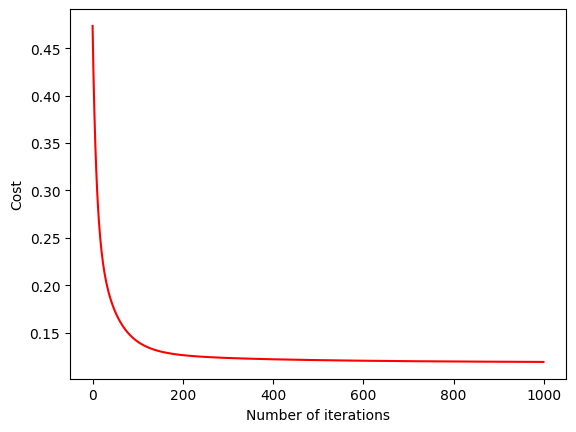

In [226]:
# Plot the cost history wrt the number of iterations

plt.plot(range(1000), cost_history, 'r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

### 1.2 Solving linear regression using Stochastic Gradient Descent

![Batch Gradient Descent](./images/stochastic_gd.png)   
**This is how the theta is updated at each step.**

In [173]:
theta = np.zeros(X_train.shape[1])

# Define the gradient descent function
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    num_of_samples = len(y)
    num_of_features = X.shape[1]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, X.shape[1]))
    for k in range(iterations):
        for i in range(num_of_samples):
            for j in range(num_of_features):
                theta[j] = theta[j] - (1/m)*alpha*(X[i][j].dot(theta)-y[j])*X[i][j]
        theta_history[k,:] = theta.T
        cost_history[k] = cost_function(X, y, theta)

    return theta, cost_history, theta_history

In [175]:
theta,cost_history,theta_history = gradient_descent(X_train, y_train, theta, 0.01, 100)
# print('Final value of theta =', theta)
# print('cost_history =', cost_history)
# print('theta_history =', theta_history)

cost_history.shape, theta_history.shape

((100,), (100, 14))

In [231]:
theta,cost_history,theta_history = gradient_descent(X_train, y_train, theta, 0.01, 1000)
prediction = predict(X_test,theta)
rmse_num = rmse(prediction, y_test)
print('RMSE =', rmse_num)
print('Final cost =', cost_history[-1])
print('Final value of theta =', theta)
# print('cost_history =', cost_history)
# print('theta_history =', theta_history)

RMSE = 0.6445018007990774
Final cost = 0.11838591165580516
Final value of theta = [-0.00363681 -0.11530123  0.09146015 -0.05236172  0.07482235 -0.18008797
  0.31323617 -0.06396962 -0.32361984  0.16659841 -0.13904042 -0.23764311
  0.08188065 -0.32024109]


Text(0.5, 1.0, 'Actual vs Prediction')

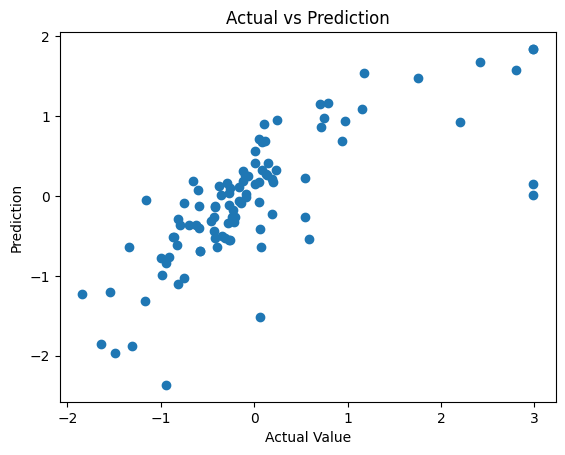

In [232]:
# Plot the prediction vs the actual values
plt.scatter(y_test[:100], prediction[:100])
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction')

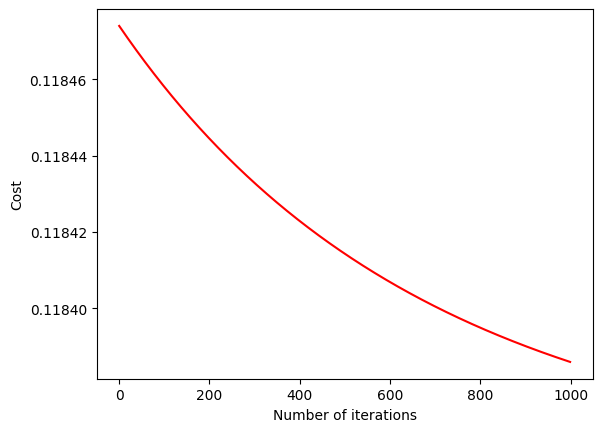

In [234]:
# Plot the cost history wrt the number of iterations

plt.plot(range(1000), cost_history, 'r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

### 1.3 Solving regression using Normal Equation

In [129]:
def fit_with_normal_equation(X, y):
    """
    Fits the model using the normal equation
    """
    # Add a column of ones to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # Calculate theta using the normal equation
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # np.linalg.inv is used to compute the (multiplicative) inverse of a matrix.
    return theta

In [130]:
theta = fit_with_normal_equation(X, y)
prediction = predict(X,theta)

(394, 14)


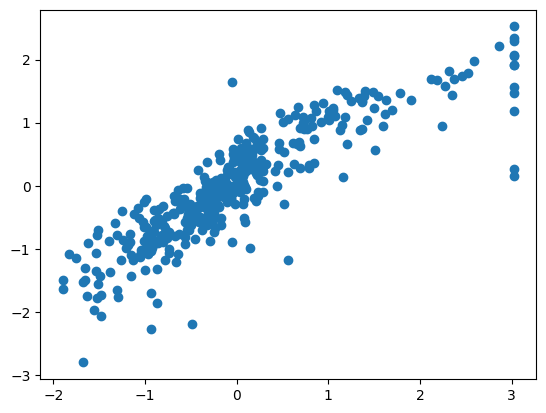

In [131]:
# Plot the prediction vs the actual values
plt.scatter(y, prediction)

In [134]:
# Find the RMSE

def rmse(prediction, y):
    """
    Calculates the root mean squared error between the prediction and the actual values
    """
    return np.sqrt(np.mean((prediction - y)**2))

rmse(prediction, y)

0.48196885036403203